In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Data Cleaning:
1. Importing files using pd.read_csv
2. Find relationships between different files (cox-violent-parsed_filt.csv vs cox-violent-parsed.csv)
3. Ensure each row corresponds to one observation and each column to a single variable
4. Plot number of missing values for each column
5. Fill/drop missing values or columns accordingly
6. Convert data types to more manageable types (dates from object to datetime)

In [117]:
compas_raw = pd.read_csv("compas-scores-raw.csv")
compas_raw.head(5)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [118]:
cox_filtered = pd.read_csv("cox-violent-parsed_filt.csv")
cox_filtered.head(5)

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [119]:
cox_parsed = pd.read_csv("cox-violent-parsed.csv")
cox_parsed.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


In [120]:
data_fairml = pd.read_csv("propublicaCompassRecividism_data_fairml.csv/propublica_data_for_fairml.csv")
data_fairml.head(5)

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


In [121]:
print("Unfiltered cox-violent-parsed shape:\n",cox_parsed.shape,"\nFiltered cox-violent-parse shape:\n",cox_filtered.shape,"\n")
print("Discrepant Columns:")
for col in cox_parsed.columns:
    if col not in cox_filtered.columns:
        print(" ",col)

Unfiltered cox-violent-parsed shape:
 (18316, 52) 
Filtered cox-violent-parse shape:
 (18316, 40) 

Discrepant Columns:
  compas_screening_date
  c_case_number
  c_offense_date
  c_arrest_date
  r_case_number
  r_jail_out
  vr_case_number
  v_screening_date
  in_custody
  out_custody
  start
  end


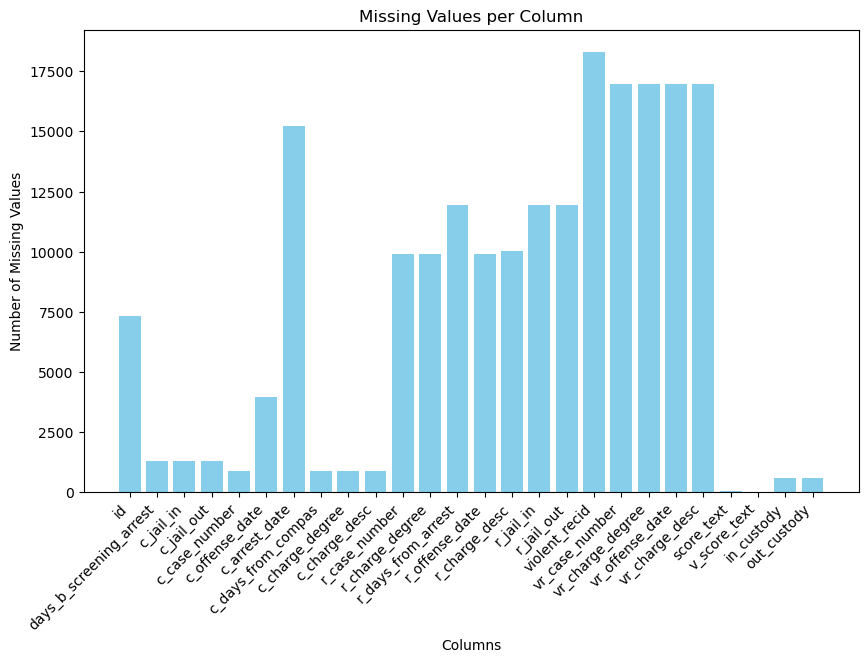

Columns with no missing values:
name
first
last
compas_screening_date
sex
dob
age
age_cat
race
juv_fel_count
decile_score
juv_misd_count
juv_other_count
priors_count
is_recid
is_violent_recid
type_of_assessment
decile_score.1
screening_date
v_type_of_assessment
v_decile_score
v_screening_date
priors_count.1
start
end
event


In [122]:
missing_count = []
full_cols = []
missing_cols = []
for col in cox_parsed.columns:
    if cox_parsed[col].isna().sum() == 0:
        full_cols.append(col)
    else:
        missing_cols.append(col)
        missing_count.append(cox_parsed[col].isna().sum())

plt.figure(figsize=(10, 6))
plt.bar(missing_cols, missing_count, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Missing Values')
plt.xlabel("Columns")
plt.title('Missing Values per Column')
plt.show()
print("Columns with no missing values:")
for col in full_cols:
    print(col)


Note that a lot of the missing data seems to be MNAR, this can be observed when the missing data in an observation is linked to other missing features within that observation. This means that the following method for filling missing values will add some bias to the data.

In [123]:
#Entire column missing
cox_parsed = cox_parsed.drop("violent_recid",axis=1)

In [124]:
#Code used to determine df types
"""
types = []
for col in cox_parsed.columns:
    if cox_parsed[col].dtype not in types:
        types.append(cox_parsed[col].dtype)
print(types)
"""
numeric_cols = cox_parsed.select_dtypes(include=['float64', 'int64']).columns
for col in cox_parsed.columns:
    if col in numeric_cols:
        cox_parsed[col] = cox_parsed[col].fillna(cox_parsed[col].mean())
    else:
        cox_parsed[col] = cox_parsed[col].fillna(cox_parsed[col].mode()[0])
print("Missing values left:",cox_parsed.isna().sum().sum())

Missing values left: 0


In [125]:
cox_parsed['dob'] = pd.to_datetime(cox_parsed['dob'], dayfirst=True, errors='coerce')
cox_parsed['c_jail_in'] = pd.to_datetime(cox_parsed['c_jail_in'], dayfirst=True, errors='coerce')
cox_parsed['c_jail_out'] = pd.to_datetime(cox_parsed['c_jail_out'], dayfirst=True, errors='coerce')
cox_parsed['compas_screening_date'] = pd.to_datetime(cox_parsed['compas_screening_date'], dayfirst=True, errors='coerce')
cox_parsed['screening_date'] = pd.to_datetime(cox_parsed['screening_date'], dayfirst=True, errors='coerce')
cox_parsed['v_screening_date'] = pd.to_datetime(cox_parsed['v_screening_date'], dayfirst=True, errors='coerce')
cox_parsed['c_offense_date'] = pd.to_datetime(cox_parsed['c_offense_date'], dayfirst=True, errors='coerce')
cox_parsed['c_arrest_date'] = pd.to_datetime(cox_parsed['c_arrest_date'], dayfirst=True, errors='coerce')
cox_parsed['r_jail_in'] = pd.to_datetime(cox_parsed['r_jail_in'], dayfirst=True, errors='coerce')
cox_parsed['r_jail_out'] = pd.to_datetime(cox_parsed['r_jail_out'], dayfirst=True, errors='coerce')
cox_parsed['r_offense_date'] = pd.to_datetime(cox_parsed['r_offense_date'], dayfirst=True, errors='coerce')
cox_parsed['vr_offense_date'] = pd.to_datetime(cox_parsed['vr_offense_date'], dayfirst=True, errors='coerce')
cox_parsed['in_custody'] = pd.to_datetime(cox_parsed['in_custody'], dayfirst=True, errors='coerce')
cox_parsed['out_custody'] = pd.to_datetime(cox_parsed['out_custody'], dayfirst=True, errors='coerce')

Compas analysis

In [126]:
print("Compas-scores-raw shape:\n",compas_raw.shape)

Compas-scores-raw shape:
 (60843, 28)


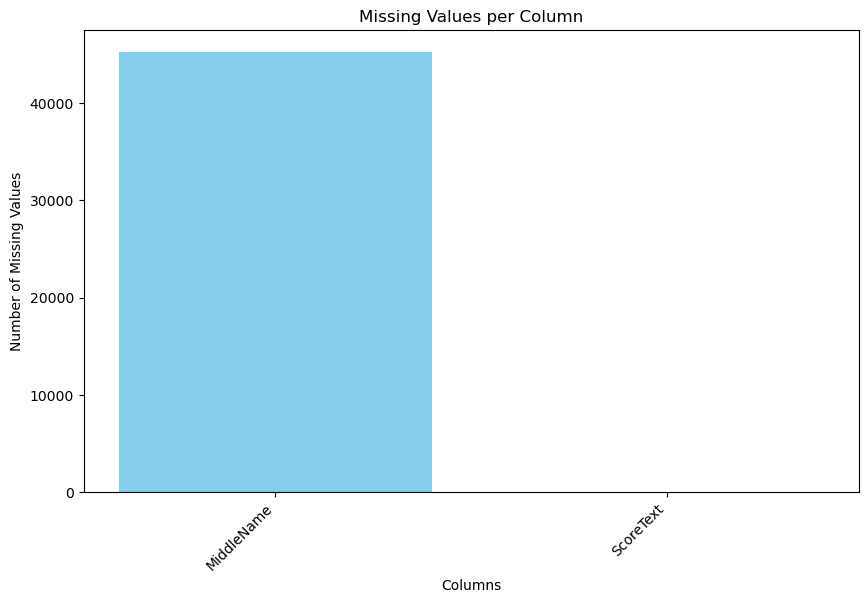

Columns with no missing values:
Person_ID
AssessmentID
Case_ID
Agency_Text
LastName
FirstName
Sex_Code_Text
Ethnic_Code_Text
DateOfBirth
ScaleSet_ID
ScaleSet
AssessmentReason
Language
LegalStatus
CustodyStatus
MaritalStatus
Screening_Date
RecSupervisionLevel
RecSupervisionLevelText
Scale_ID
DisplayText
RawScore
DecileScore
AssessmentType
IsCompleted
IsDeleted


In [127]:
missing_count = []
full_cols = []
missing_cols = []
for col in compas_raw.columns:
    if compas_raw[col].isna().sum() == 0:
        full_cols.append(col)
    else:
        missing_cols.append(col)
        missing_count.append(compas_raw[col].isna().sum())

plt.figure(figsize=(10, 6))
plt.bar(missing_cols, missing_count, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Missing Values')
plt.xlabel("Columns")
plt.title('Missing Values per Column')
plt.show()
print("Columns with no missing values:")
for col in full_cols:
    print(col)

In [128]:
print("Missing Score text count:",compas_raw["ScoreText"].isna().sum())
compas_raw = compas_raw.drop("MiddleName",axis=1)
compas_raw = compas_raw.dropna(subset=["ScoreText"])
print("Missing Score text count:",compas_raw["ScoreText"].isna().sum())

Missing Score text count: 45
Missing Score text count: 0


In [129]:
compas_raw['DateOfBirth'] = pd.to_datetime(compas_raw['DateOfBirth'], errors='coerce')

/var/folders/mw/_z8tm4zj15347h8_rwbsg5xc0000gn/T/ipykernel_90661/2975088506.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  compas_raw['DateOfBirth'] = pd.to_datetime(compas_raw['DateOfBirth'], errors='coerce')


Exploratory Analysis

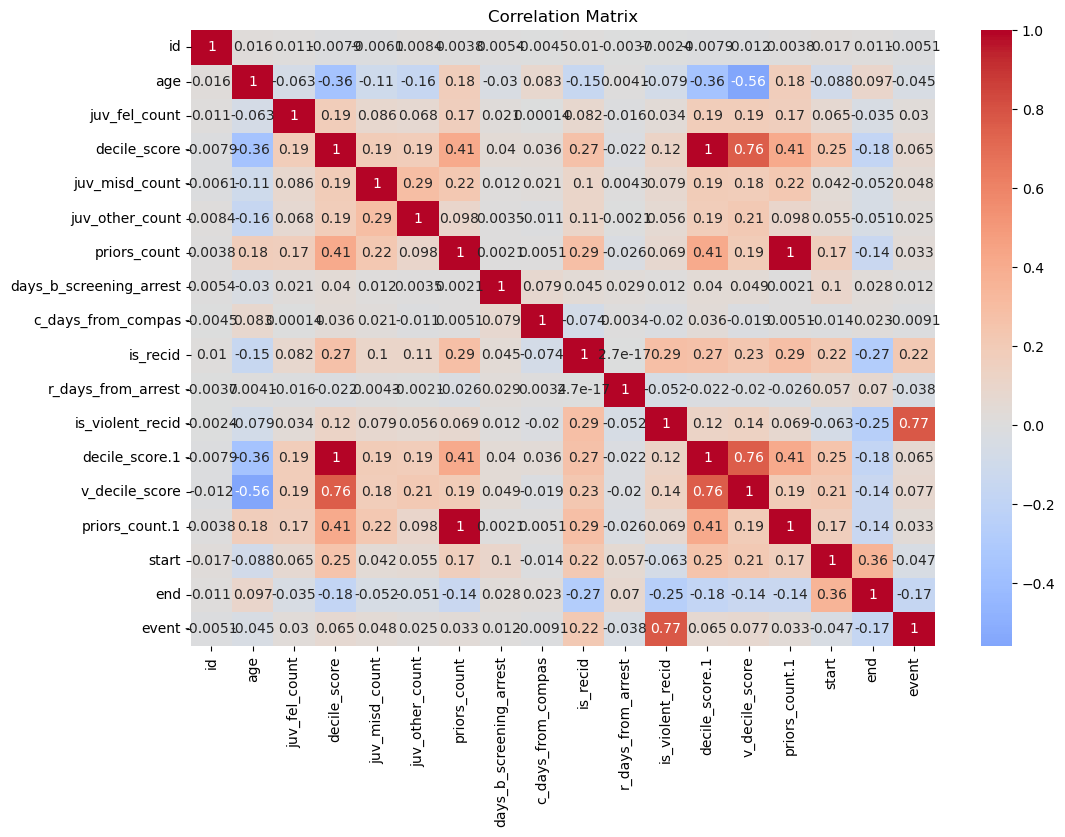

In [133]:
correlation_matrix = cox_parsed.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
numeric_cols = cox_parsed.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = list(numeric_cols)
numeric_cols.remove("is_recid")
X = cox_parsed[numeric_cols].copy()
y = cox_parsed['is_recid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score", r2_score(y_test, y_pred))
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:")
print(coefficients)

Mean Squared Error: 0.2776155999732903
R² Score: 0.15008442060684535

Lasso Coefficients:
id                         0.000000
age                       -0.000000
juv_fel_count              0.000000
decile_score               0.012756
juv_misd_count             0.000000
juv_other_count            0.000000
priors_count               0.046307
days_b_screening_arrest    0.000000
c_days_from_compas        -0.000000
r_days_from_arrest         0.000000
is_violent_recid           0.051484
decile_score.1             0.001129
v_decile_score             0.000000
priors_count.1             0.000000
start                      0.032728
end                       -0.042649
event                      0.000000
dtype: float64


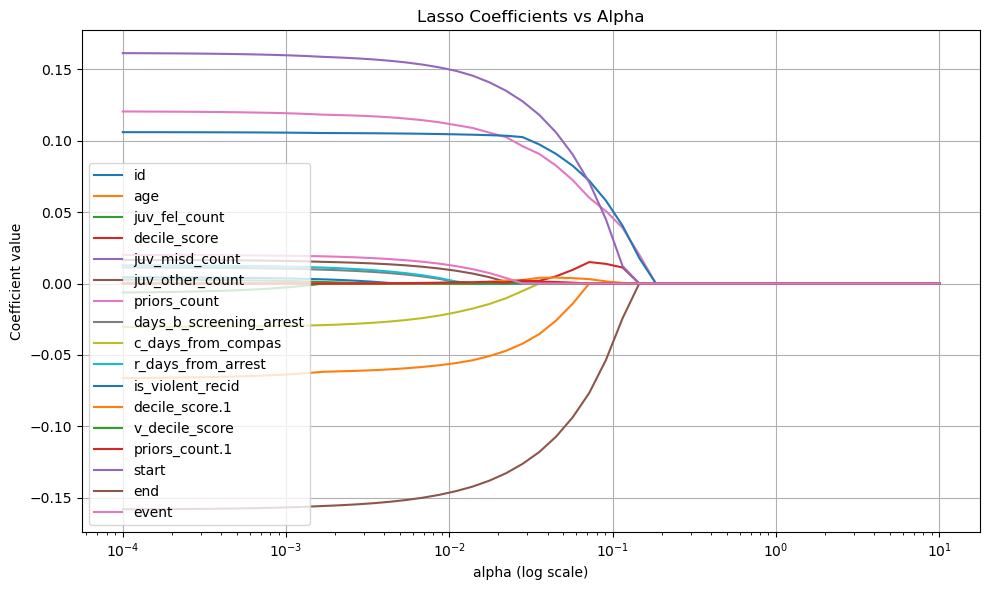

In [153]:
alphas = np.logspace(-4, 1, 50)
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i, col in enumerate(X.columns):
    plt.plot(alphas, coefs[:, i], label=col)
plt.xscale('log')
plt.xlabel("alpha (log scale)")
plt.ylabel("Coefficient value")
plt.title("Lasso Coefficients vs Alpha")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

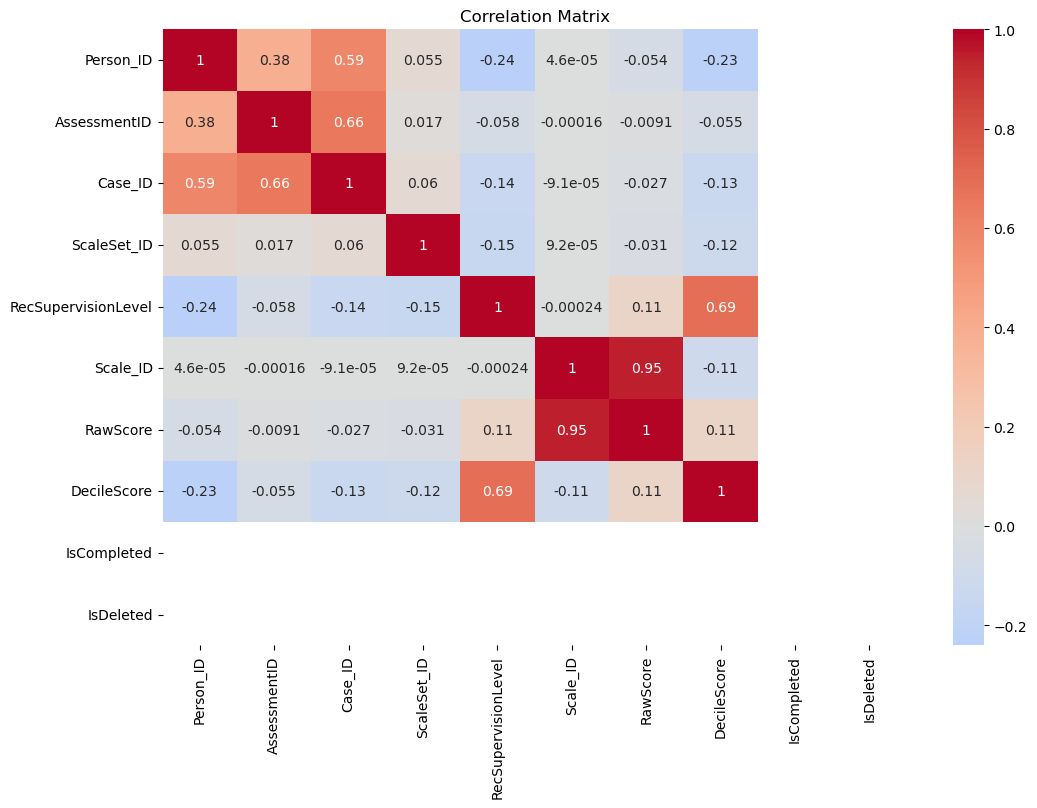

In [154]:
correlation_matrix = compas_raw.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [155]:
numeric_cols = compas_raw.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = list(numeric_cols)
numeric_cols.remove("RawScore")
X = compas_raw[numeric_cols].copy()
y = compas_raw['RawScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score", r2_score(y_test, y_pred))
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:")
print(coefficients)

MSE: 5.828433214759873
R^2 Score 0.9425255677202109

Lasso Coefficients:
Person_ID             -0.000000
AssessmentID           0.000000
Case_ID               -0.000000
ScaleSet_ID           -0.000000
RecSupervisionLevel   -0.317707
Scale_ID               9.697741
DecileScore            2.292994
IsCompleted            0.000000
IsDeleted              0.000000
dtype: float64


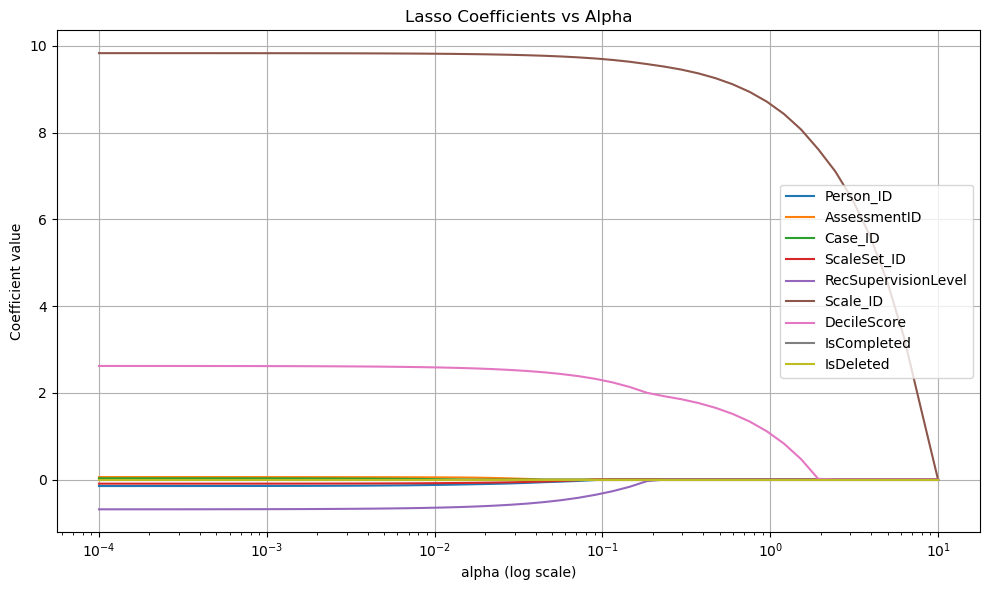

In [156]:
alphas = np.logspace(-4, 1, 50)
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i, col in enumerate(X.columns):
    plt.plot(alphas, coefs[:, i], label=col)
plt.xscale('log')
plt.xlabel("alpha (log scale)")
plt.ylabel("Coefficient value")
plt.title("Lasso Coefficients vs Alpha")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()